# 6 - PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [28]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True


## IMPORTAR LOS DATOS

Cargar los datos.

In [29]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,precio_compra_oe,precio_mto_oe,n_puertas_oe,n_personas_oe,t_maletero_oe,nivel_seguridad_oe,aceptabilidad_oe
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0


In [30]:
df.corr()

,precio_compra_oe,precio_mto_oe,n_puertas_oe,n_personas_oe,t_maletero_oe,nivel_seguridad_oe,aceptabilidad_oe
precio_compra_oe,1.000000,-0.001918,-0.021880,-0.010532,-0.036468,0.011486,-0.284503
precio_mto_oe,-0.001918,1.000000,-0.021075,-0.003116,-0.003410,-0.009808,-0.223081
n_puertas_oe,-0.021880,-0.021075,1.000000,-0.020809,0.017870,0.027070,0.079469
n_personas_oe,-0.010532,-0.003116,-0.020809,1.000000,-0.009970,-0.007533,0.332025
t_maletero_oe,-0.036468,-0.003410,0.017870,-0.009970,1.000000,-0.008736,0.141933
nivel_seguridad_oe,0.011486,-0.009808,0.027070,-0.007533,-0.008736,1.000000,0.437438
aceptabilidad_oe,-0.284503,-0.223081,0.079469,0.332025,0.141933,0.437438,1.000000


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [31]:
target = 'aceptabilidad_oe'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [32]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (16,5))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

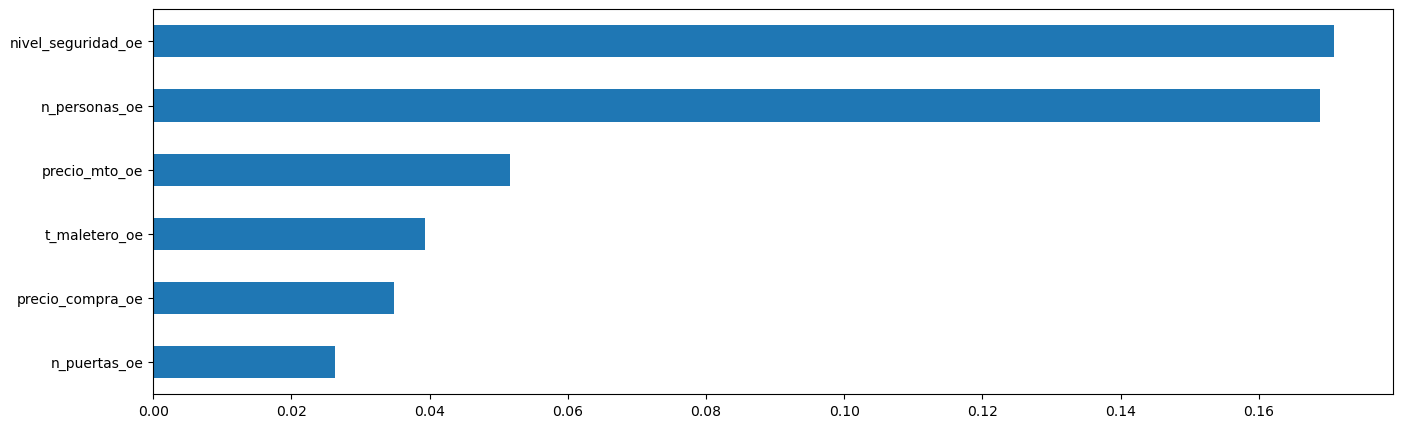

In [33]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [34]:
posicion_variable_limite = 6

##### Extraer los nombres de las que entran

In [35]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [36]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [37]:
rfe = RFE(estimator = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc'))

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Entrenar

In [38]:
rfe.fit(x,y)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=None, ...))

##### Extraer los nombres de las que entran

In [39]:
entran_rfe = x.columns[rfe.support_]
entran_rfe

Index(['precio_compra_oe', 'n_personas_oe', 'nivel_seguridad_oe'], dtype='object')

#### Crear el dataframe con la selección

In [40]:
x_rfe = x[entran_rfe].copy()

### Permutation Importance

#### Crear una función para mostrar el resultado

In [41]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [42]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'accuracy',
                                     n_repeats=5, n_jobs = -1)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Revisar la salida

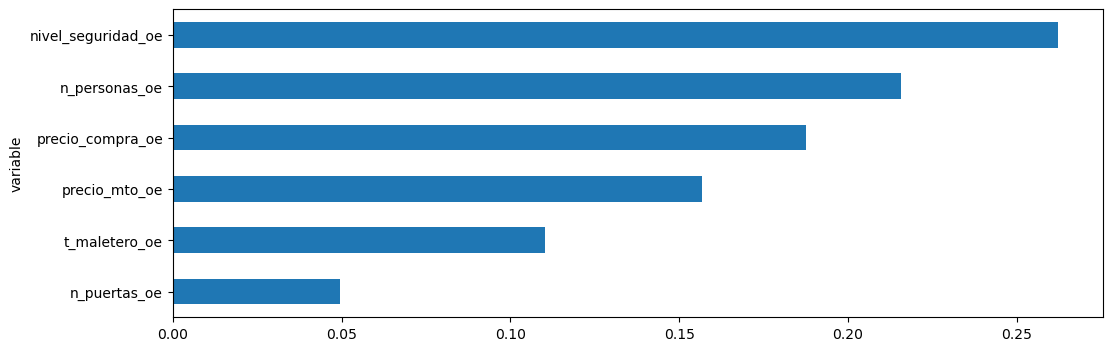

In [43]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,4));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [44]:
posicion_variable_limite = 6

##### Extraer los nombres de las que entran

In [45]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [46]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [47]:
x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
# x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [48]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [49]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [50]:
cor_finales.var1.value_counts()

Series([], Name: var1, dtype: int64)

##### Revisar detalle

In [51]:
cor_finales.head(50)

,var1,var2,corr


In [52]:
x_preseleccionado.columns.to_list()

['nivel_seguridad_oe',
 'n_personas_oe',
 'precio_mto_oe',
 't_maletero_oe',
 'precio_compra_oe']

**CONCLUSIÓN:** No se detectan correlaciones fuerte entre predictoras.

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [53]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = '../../02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = '../../02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [54]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)